In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [3]:
drama = pd.read_csv('Data/top100_kdrama.csv')

In [4]:
drama.head(5)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


In [5]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [6]:
drama.describe()

,Year of release,Number of Episode,Rating
count,100.000000,100.000000,100.000000
mean,2017.970000,19.070000,8.723000
std,2.869044,12.378096,0.174573
min,2003.000000,6.000000,8.500000
25%,2017.000000,16.000000,8.600000
50%,2019.000000,16.000000,8.700000
75%,2020.000000,20.000000,8.800000
max,2021.000000,100.000000,9.200000


In [7]:
drama['Rating'].describe()

count    100.000000
mean       8.723000
std        0.174573
min        8.500000
25%        8.600000
50%        8.700000
75%        8.800000
max        9.200000
Name: Rating, dtype: float64

In [8]:
drama[['Year of release', 'Rating']]

,Year of release,Rating
0,2021,9.2
1,2020,9.1
2,2020,9.1
3,2021,9.1
4,2018,9.1
...,...,...
95,2019,8.5
96,2019,8.5
97,2019,8.5
98,2017,8.5


In [9]:
d = drama.sort_values('Year of release') #내림차순 ,ascending = False

In [10]:
d.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
64,Jewel in the Palace,2003,"Sep 15, 2003 - Mar 23, 2004","Monday, Tuesday",54,MBC,1 hr. 5 min.,13+ - Teens 13 or older,About 500 years ago during the time of Chosun ...,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...","Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",#65,8.6
62,The Bridal Mask,2012,"May 30, 2012 - Sep 6, 2012","Wednesday, Thursday",28,KBS2,1 hr. 5 min.,15+ - Teens 15 or older,Lee Kang To is an ambitious and callous Korean...,"Joo Won, Jin Se Yeon, Park Ki Woong, Han Chae ...","Action, Historical, Romance, Political","Japanese Colonial Rule, Hidden Identity, Reven...",#63,8.6
88,Reply 1997,2012,"Jul 24, 2012 - Sep 18, 2012",Tuesday,16,tvN,60 min.,15+ - Teens 15 or older,"Set in the 1990's, the drama centers around a ...","Jung Eun Ji, Seo In Guk, Hoya, Shin So Yool, E...","Comedy, Romance, Life, Family","Childhood Friends, High School, 1990s, Strong ...",#89,8.5
80,The Master's Sun,2013,"Aug 7, 2013 - Oct 3, 2013","Wednesday, Thursday",17,SBS,1 hr. 2 min.,15+ - Teens 15 or older,Joo Joong Won is the stingy and greedy CEO of ...,"Gong Hyo Jin, So Ji Sub, Seo In Guk, Kim Yoo R...","Horror, Comedy, Romance, Supernatural","Ghost, Eccentric Female Lead, Rich Male Lead, ...",#81,8.6
74,Cruel City,2013,"May 27, 2013 - Jul 30, 2013","Monday, Tuesday",20,jTBC,60 min.,15+ - Teens 15 or older,Portrays the cruel life of the drug cartels an...,"Jung Kyung Ho, Nam Gyu Ri, Lee Jae Yoon, Son C...","Action, Thriller, Romance, Crime","Badass Male Lead, Gang, Bromance, Strong Femal...",#75,8.6


In [11]:
d = drama.sort_values('Number of Episode', ascending = False)

In [12]:
d.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...","Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",#82,8.6
64,Jewel in the Palace,2003,"Sep 15, 2003 - Mar 23, 2004","Monday, Tuesday",54,MBC,1 hr. 5 min.,13+ - Teens 13 or older,About 500 years ago during the time of Chosun ...,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...","Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",#65,8.6
65,My Father is Strange,2017,"Mar 4, 2017 - Aug 27, 2017","Saturday, Sunday",52,KBS2,1 hr. 6 min.,15+ - Teens 15 or older,This drama is about a family that lives on the...,"Kim Yeong Cheol, Kim Hae Sook, Ryu Soo Young, ...","Comedy, Romance, Drama, Family","Family Secret, Sisterhood, Eccentric Female Le...",#66,8.6
71,Empress Ki,2013,"Oct 28, 2013 - Apr 29, 2014","Monday, Tuesday",51,MBC,1 hr. 5 min.,15+ - Teens 15 or older,Genghis Khan built an empire that spanned vast...,"Ha Ji Won, Ji Chang Wook, Joo Jin Mo, Baek Jin...","Historical, Romance, Melodrama, Political","Smart Female Lead, Strong Female Lead, Power S...",#72,8.6
32,Six Flying Dragons,2015,"Oct 5, 2015 - Mar 22, 2016","Monday, Tuesday",50,SBS,60 min.,15+ - Teens 15 or older,"A fiction historical drama about the ambition,...","Yoo Ah In, Kim Myung Min, Shin Se Kyung, Byun ...","Action, Historical, Drama, Political","Revolution, Power Struggle, Political Intrigue...",#33,8.8


In [13]:
count = drama['Year of release'].value_counts()

In [14]:
count

Year of release
2021    19
2020    17
2017    16
2019    15
2018    10
2016     8
2013     5
2014     4
2015     3
2012     2
2003     1
Name: count, dtype: int64

In [15]:
count1 = drama.value_counts('Year of release')
count1

Year of release
2021    19
2020    17
2017    16
2019    15
2018    10
2016     8
2013     5
2014     4
2015     3
2012     2
2003     1
Name: count, dtype: int64

In [16]:
count2 = drama.value_counts('Rating')
count2

Rating
8.6    25
8.7    24
8.8    16
8.5    15
9.0     9
8.9     5
9.1     5
9.2     1
Name: count, dtype: int64

In [17]:
count3 = drama['Rating'].value_counts(ascending = True)
count3

Rating
9.2     1
9.1     5
8.9     5
9.0     9
8.5    15
8.8    16
8.7    24
8.6    25
Name: count, dtype: int64

In [18]:
count4 = drama['Network'].value_counts(ascending = True)
count4

Network
Netflix,  OCN       1
jTBC,  Viki         1
KBS2,  Netflix      1
Netflix,  SBS       2
jTBC,  Netflix      2
Netflix             7
OCN                 7
jTBC                8
MBC                 9
KBS2               10
Netflix,  tvN      16
SBS                17
tvN                19
Name: count, dtype: int64

In [19]:
drama[['Name', 'Rating']]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [20]:
drama.loc[:,['Name', 'Rating']]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [21]:
drama.iloc[:,[0,-1]] # index 번호 (Column)

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [22]:
# episode 가 가장 많은 드라마 정보

drama['Number of Episode'].max()

100

In [23]:
d = drama['Number of Episode']==drama['Number of Episode'].max()
drama[d]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...","Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",#82,8.6


In [24]:
d2 = drama['Number of Episode']==drama['Number of Episode'].min()
drama.Name[d2]

16                      Kingdom
23                         D.P.
24                      Kingdom
45    Arthdal Chronicles Part 2
47    Arthdal Chronicles Part 3
92    Arthdal Chronicles Part 1
Name: Name, dtype: object

In [25]:
drama[d2]['Name']

16                      Kingdom
23                         D.P.
24                      Kingdom
45    Arthdal Chronicles Part 2
47    Arthdal Chronicles Part 3
92    Arthdal Chronicles Part 1
Name: Name, dtype: object

In [26]:
d3 = drama['Network'].str.contains('Netflix')
drama[d3].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0


In [27]:
d4 = drama['Network'].str.contains('Netflix') | drama['Network'].str.contains('tvN')
drama[d4].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


In [28]:
d5 = drama['Network'].str.contains('Netflix | tvN')
drama[d5].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0


In [29]:
d4 = drama['Network'].str.contains('Netflix' or 'tvN')
drama[d4].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0


In [30]:
d4 = drama['Network'].str.contains('Netflix', 'tvN') 
drama[d4].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0


In [31]:
# d1 = drama['Network'].str.contains('Netflix' or 'tvN')#('Netflix' , 'tvN') ## 다른 네트워크 허용

# #('Netflix  |  tvN')  # 다른 네트워크는 허용하지 않음

# drama[d1]

In [32]:
d5 = drama['Network'].str.contains('Netflix') & drama['Network'].str.contains('tvN')
drama[d5].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0
11,Navillera,2021,"Mar 22, 2021 - Apr 27, 2021","Monday, Tuesday",12,"Netflix, tvN",1 hr. 5 min.,15+ - Teens 15 or older,A 70-year-old with a dream and a 23-year-old w...,"Park In Hwan, Song Kang, Na Moon Hee, Hong Seu...","Friendship, Life, Drama, Family","Ballet, Dream, Life Lesson, Old-Young Generati...",#12,9.0


In [33]:
d6 = ( drama['Year of release'] >= 2015 )&(drama['Year of release'] <= 2020 )
drama[d6]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
6,Reply 1988,2015,"Nov 6, 2015 - Jan 16, 2016","Friday, Saturday",20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...",#7,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vagabond,2019,"Sep 20, 2019 - Nov 23, 2019","Friday, Saturday",16,"Netflix, SBS",1 hr. 10 min.,15+ - Teens 15 or older,Cha Dal Gun becomes an awakened tiger in the f...,"Lee Seung Gi, Bae Suzy, Shin Sung Rok, Baek Y...","Action, Thriller, Mystery, Crime","Plane Crash, Revenge, National Intelligence Se...",#96,8.5
96,Doctor John,2019,"Jul 19, 2019 - Sep 7, 2019","Friday, Saturday",32,SBS,35 min.,15+ - Teens 15 or older,“Doctor John” is a medical drama about doctors...,"Ji Sung, Lee Se Young, Lee Kyu Hyung, Hwang He...","Mystery, Romance, Life, Medical","Smart Male Lead, Incurable Disease, Eccentric ...",#97,8.5
97,When the Camellia Blooms,2019,"Sep 18, 2019 - Nov 21, 2019","Wednesday, Thursday",40,"KBS2, Netflix",35 min.,15+ - Teens 15 or older,Dong Baek is a single mother living in the sma...,"Gong Hyo Jin, Kang Ha Neul, Kim Ji Suk, Son Da...","Thriller, Comedy, Romance, Drama, Family","Single Mother, Mystery, Motherhood, Serial Kil...",#98,8.5
98,Because This Is My First Life,2017,"Oct 9, 2017 - Nov 28, 2017","Monday, Tuesday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,A house-poor man and homeless woman become hou...,"Jung So Min, Lee Min Ki, Esom, Park Byung Eun,...","Comedy, Romance, Life, Drama","Contract Relationship, Marriage Of Convenience...",#99,8.5


In [34]:
drama.isnull()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
drama.isnull().sum()

Name                 0
Year of release      0
Aired Date           0
Aired On             0
Number of Episode    0
Network              0
Duration             0
Content Rating       0
Synopsis             0
Cast                 0
Genre                0
Tags                 0
Rank                 0
Rating               0
dtype: int64

In [36]:
# 방영일(Aired Date), 에피소드 길이(Duration),줄거리(Synopsis),출연자(Cast),태그(Tags) 삭제
col=['Aired Date','Duration','Synopsis','Cast','Tags']

newdrama = drama.drop(col, axis = 1)
newdrama.head()

,Name,Year of release,Aired On,Number of Episode,Network,Content Rating,Genre,Rank,Rating
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Thriller, Romance, Crime, Melodrama",#3,9.1
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#4,9.1
4,My Mister,2018,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Psychological, Life, Drama, Family",#5,9.1


In [37]:
newdrama.columns

Index(['Name', 'Year of release', 'Aired On', 'Number of Episode', 'Network',
       'Content Rating', 'Genre', 'Rank', 'Rating'],
      dtype='object')

In [38]:
newdrama.columns=['이름','개봉년도','요일','에피소드수','네트워크','등급','장르','순위','평점']
newdrama.columns

Index(['이름', '개봉년도', '요일', '에피소드수', '네트워크', '등급', '장르', '순위', '평점'], dtype='object')

In [39]:
newdrama

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Thriller, Romance, Crime, Melodrama",#3,9.1
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#4,9.1
4,My Mister,2018,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Psychological, Life, Drama, Family",#5,9.1
...,...,...,...,...,...,...,...,...,...
95,Vagabond,2019,"Friday, Saturday",16,"Netflix, SBS",15+ - Teens 15 or older,"Action, Thriller, Mystery, Crime",#96,8.5
96,Doctor John,2019,"Friday, Saturday",32,SBS,15+ - Teens 15 or older,"Mystery, Romance, Life, Medical",#97,8.5
97,When the Camellia Blooms,2019,"Wednesday, Thursday",40,"KBS2, Netflix",15+ - Teens 15 or older,"Thriller, Comedy, Romance, Drama, Family",#98,8.5
98,Because This Is My First Life,2017,"Monday, Tuesday",16,tvN,15+ - Teens 15 or older,"Comedy, Romance, Life, Drama",#99,8.5


In [40]:
newdrama['장르갯수'] = newdrama['장르'].str.count(',')+1
newdrama.head()

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점,장르갯수
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2,3
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1,4
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Thriller, Romance, Crime, Melodrama",#3,9.1,4
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#4,9.1,4
4,My Mister,2018,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Psychological, Life, Drama, Family",#5,9.1,4


In [41]:
newdrama['네트워크갯수'] = newdrama['네트워크'].str.count(',')+1
newdrama.head()

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점,장르갯수,네트워크갯수
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2,3,1
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1,4,2
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Thriller, Romance, Crime, Melodrama",#3,9.1,4,1
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#4,9.1,4,2
4,My Mister,2018,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Psychological, Life, Drama, Family",#5,9.1,4,1


In [43]:
### 데이터 그룹핑 _ 개봉년도별로 드라마 갯수

dd = newdrama.groupby('개봉년도')['이름'].count()
dd

개봉년도
2003     1
2012     2
2013     5
2014     4
2015     3
2016     8
2017    16
2018    10
2019    15
2020    17
2021    19
Name: 이름, dtype: int64

In [44]:
pd.DataFrame(dd)

,이름
개봉년도,
2003,1
2012,2
2013,5
2014,4
2015,3
2016,8
2017,16
2018,10
2019,15


In [48]:
## ### 데이터 그룹핑 _ 개봉년도별, 평점,로 드라마 갯수

dd2 = newdrama.groupby(['개봉년도','평점'])['이름'].count()
pd.DataFrame(dd2).head(10)

이름
개봉년도 평점     
2003 8.6   1
2012 8.5   1
     8.6   1
2013 8.5   1
     8.6   4
2014 8.6   2
     8.7   1
     8.9   1
2015 8.7   1
     8.8   1

In [50]:
## ### 데이터 그룹핑 _ 개봉년도별, 평점 평균
dd3 = newdrama.groupby('개봉년도')['평점'].mean()
pd.DataFrame(dd3).head(10)

,평점
개봉년도,
2003,8.600000
2012,8.550000
2013,8.580000
2014,8.700000
2015,8.833333
2016,8.750000
2017,8.662500
2018,8.790000
2019,8.646667


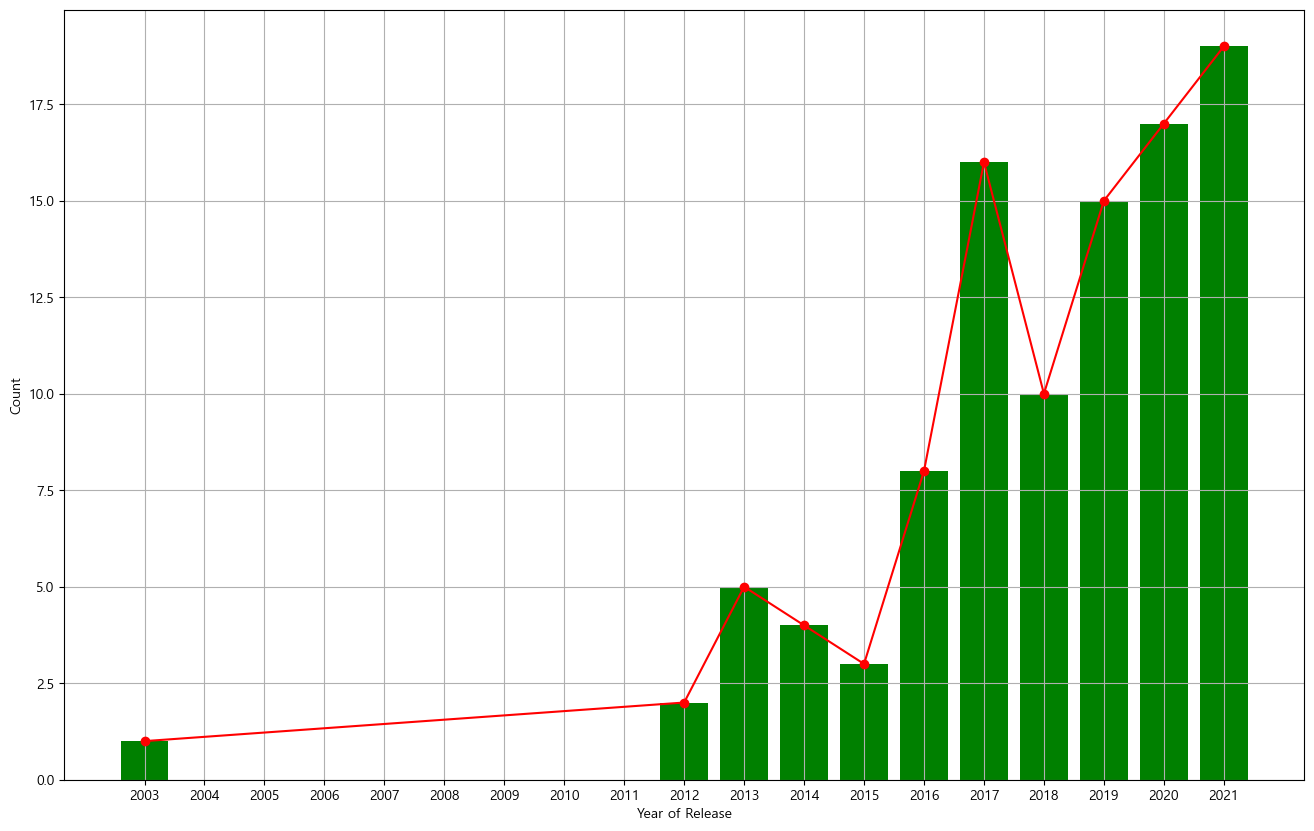

In [60]:
### 데이터 시각화 - 개봉 년도별 드라마 수

import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
matplotlib=reload(plt)

plt.figure(figsize = (16,10))
plt.plot(dd, color = 'r', marker = 'o')
plt.bar(dd.index, dd, color = 'g')
plt.xticks(range(2003,2022,1))
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.grid()
plt.show()

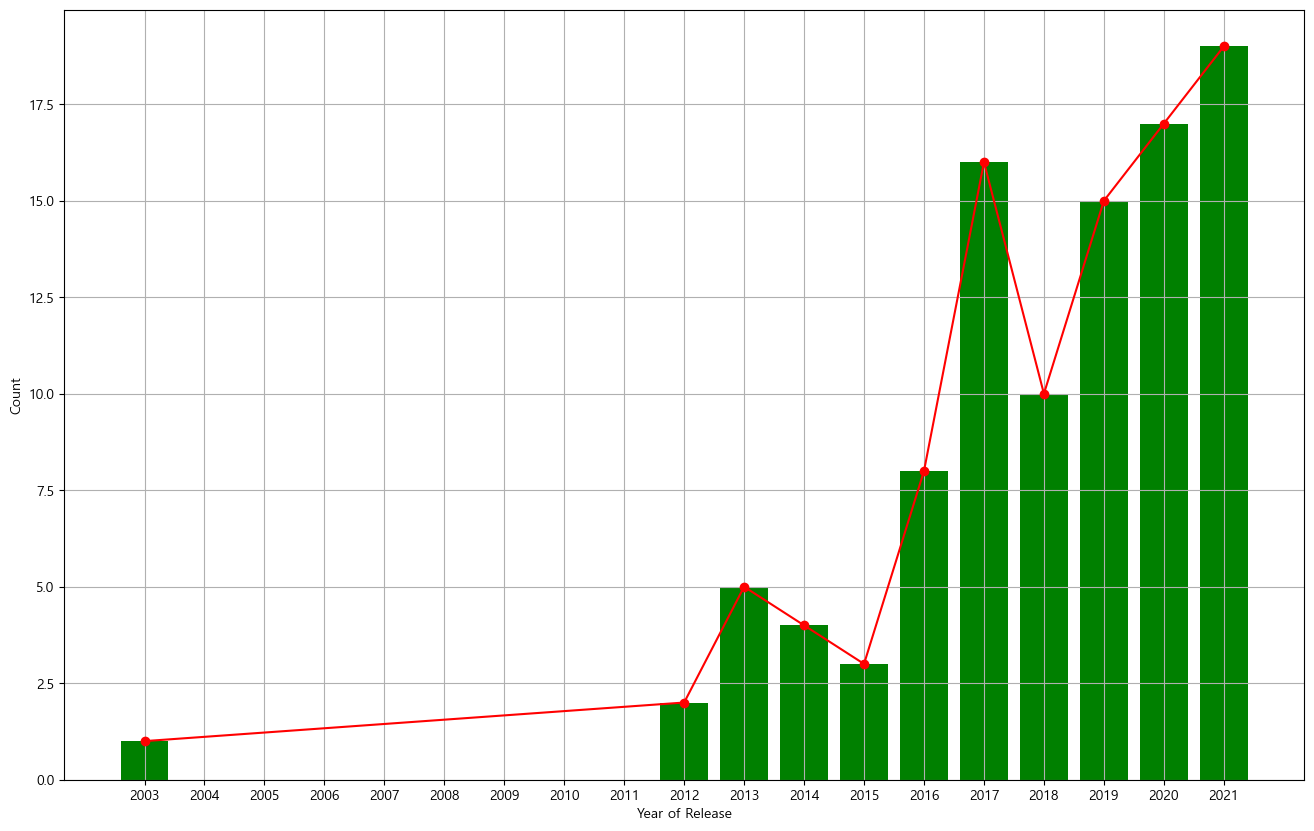

In [61]:
dd = newdrama.groupby('개봉년도')['이름'].size()
plt.figure(figsize = (16,10))
plt.plot(dd, color = 'r', marker = 'o')
plt.bar(dd.index, dd, color = 'g')
plt.xticks(range(2003,2022,1))
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.grid()
plt.show()

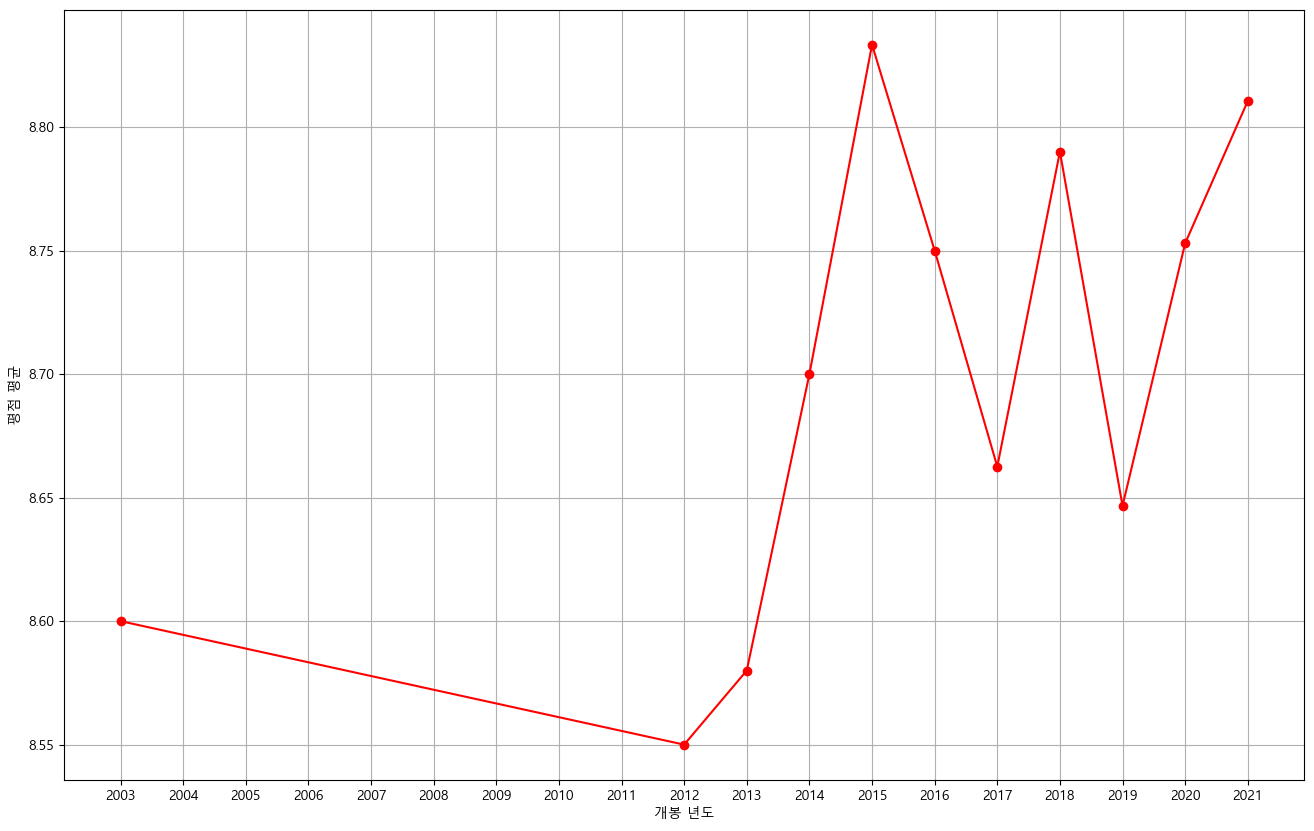

In [62]:
## 개봉 년도별 평점의 평균 시각화

plt.figure(figsize = (16,10))
plt.plot(dd3, color = 'r', marker = 'o')
plt.xticks(range(2003,2022,1))
plt.xlabel('개봉 년도')
plt.ylabel('평점 평균')
plt.grid()
plt.show()

In [64]:
## 개봉 년도별 드라마 갯수 (년도의 갯수를 count, 이름 개수count와 다름)

t = newdrama['개봉년도'].value_counts()
t

개봉년도
2021    19
2020    17
2017    16
2019    15
2018    10
2016     8
2013     5
2014     4
2015     3
2012     2
2003     1
Name: count, dtype: int64

In [65]:
tt = newdrama['등급'].value_counts()
tt

등급
15+ - Teens 15 or older                   88
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    2
Name: count, dtype: int64

In [66]:
t2 = newdrama.groupby('등급')['이름'].count()
pd.DataFrame(t2).head(10)

,이름
등급,
13+ - Teens 13 or older,2
15+ - Teens 15 or older,88
18+ Restricted (violence & profanity),10


In [71]:
newdrama.groupby(['개봉년도','등급']).size()

개봉년도  등급                                    
2003  13+ - Teens 13 or older                    1
2012  15+ - Teens 15 or older                    2
2013  15+ - Teens 15 or older                    5
2014  15+ - Teens 15 or older                    3
      18+ Restricted (violence & profanity)      1
2015  15+ - Teens 15 or older                    3
2016  15+ - Teens 15 or older                    8
2017  15+ - Teens 15 or older                   16
2018  15+ - Teens 15 or older                    9
      18+ Restricted (violence & profanity)      1
2019  15+ - Teens 15 or older                   14
      18+ Restricted (violence & profanity)      1
2020  15+ - Teens 15 or older                   15
      18+ Restricted (violence & profanity)      2
2021  13+ - Teens 13 or older                    1
      15+ - Teens 15 or older                   13
      18+ Restricted (violence & profanity)      5
dtype: int64

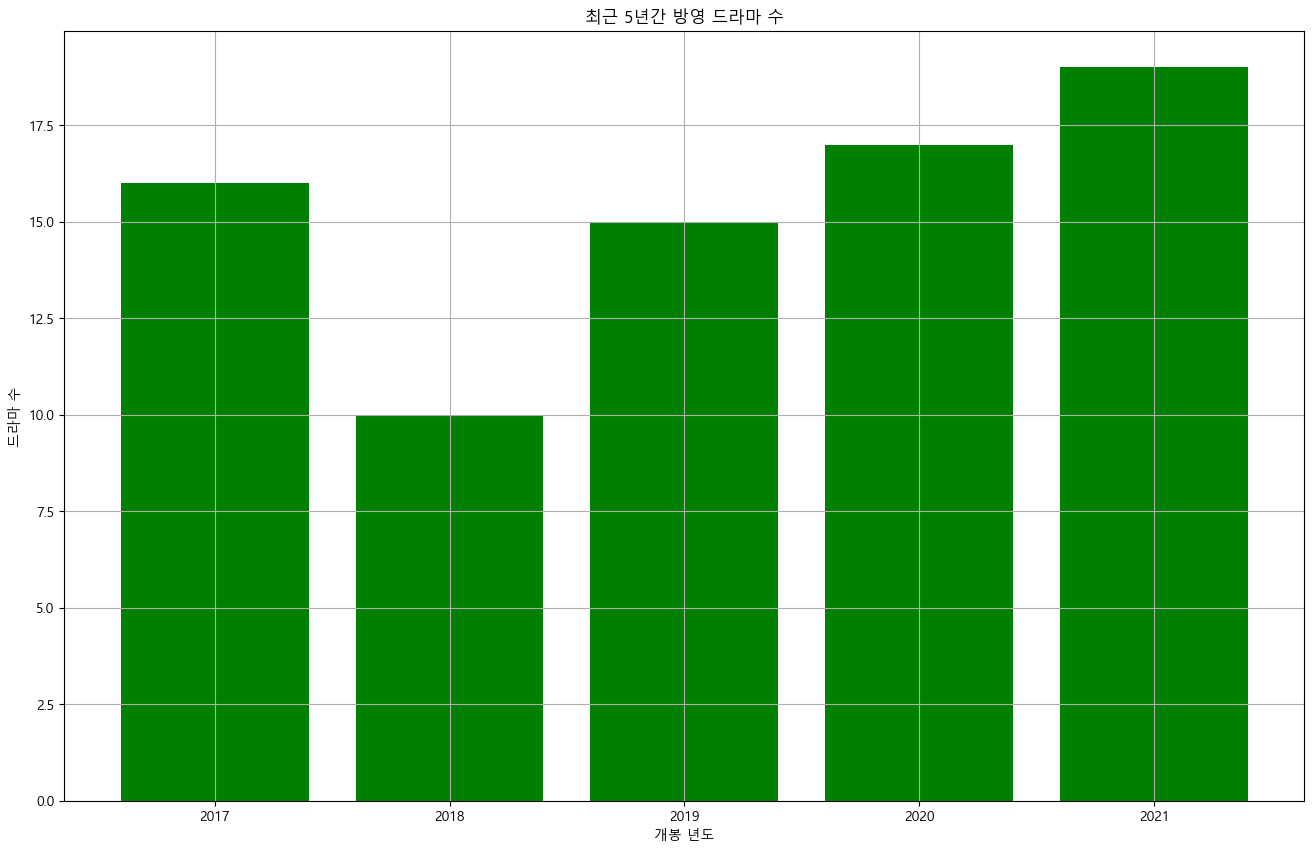

In [76]:
# 최근 5년간 개봉년도별 드라마갯수 시각화

Recent_count = newdrama['개봉년도'].value_counts().head(5)
plt.figure(figsize = (16,10))
# plt.plot(dd, color = 'r', marker = 'o')
plt.bar(Recent_count.index, Recent_count, color = 'g')
# plt.xticks(range(2003,2022,1))
plt.xlabel('개봉 년도')
plt.ylabel('드라마 수')
plt.title('최근 5년간 방영 드라마 수')
plt.grid()
plt.show()


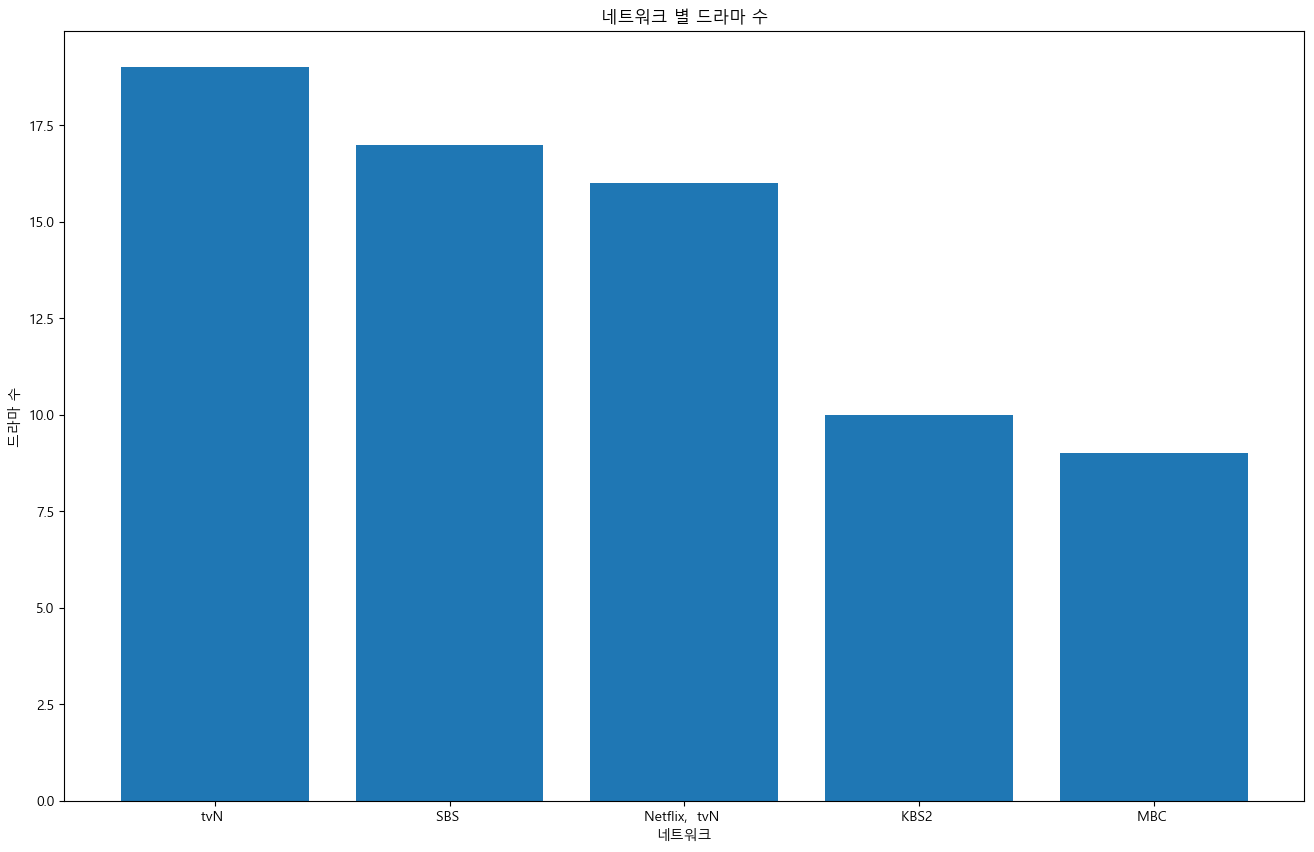

In [78]:
##네트워크별 상위 5개 의 드라마 개수
Top5_Networks = newdrama['네트워크'].value_counts().head(5)
plt.figure(figsize = (16,10))
# plt.plot(dd, color = 'r', marker = 'o')
plt.bar(Top5_Networks.index, Top5_Networks)
# plt.xticks(range(2003,2022,1))
plt.xlabel('네트워크')
plt.ylabel('드라마 수')
plt.title('네트워크 별 드라마 수')
# plt.grid()
plt.show()

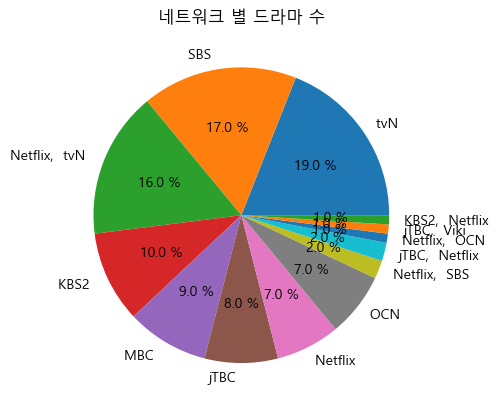

In [85]:
Top_Networks = newdrama['네트워크'].value_counts()
plt.title('네트워크 별 드라마 수')
plt.pie(Top_Networks, labels=Top_Networks.index, autopct ='%.1f %%')
plt.show()

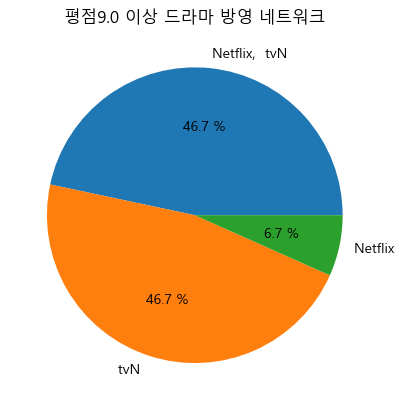

In [93]:
Topscore = newdrama[( newdrama['평점'] >= 9.0 )]
Top_Dramas = Topscore['네트워크'].value_counts()
plt.title('평점9.0 이상 드라마 방영 네트워크')
plt.pie(Top_Dramas, labels=Top_Dramas.index, autopct ='%.1f %%')
plt.show()

In [98]:
# 방영요일 확인 및 시각화

Drama_d = newdrama['요일'].value_counts()
Drama_d

요일
 Monday, Tuesday        24
 Wednesday, Thursday    23
 Saturday, Sunday       21
 Friday, Saturday       20
 Friday                  7
 Thursday                2
 Sunday, Saturday        1
 Saturday                1
 Tuesday                 1
Name: count, dtype: int64

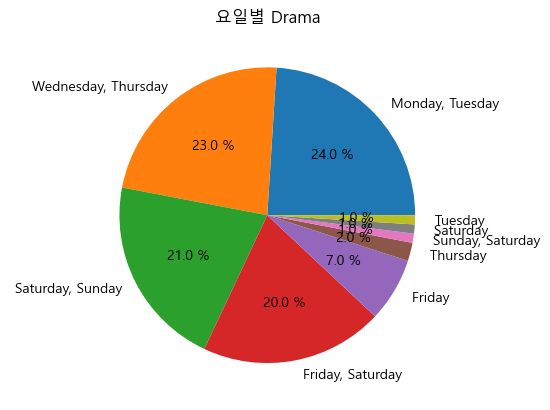

In [99]:
plt.title('요일별 Drama')
plt.pie(Drama_d, labels=Drama_d.index, autopct ='%.1f %%')
plt.show()

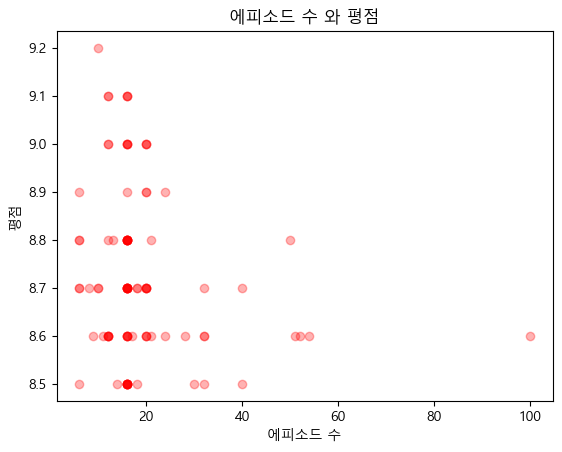

In [107]:
# 에피소드 수와 평점의 Scatter 분포
plt.scatter(newdrama['에피소드수'],newdrama['평점'], color = 'r', alpha = 0.3)
plt.title('에피소드 수 와 평점')
plt.xlabel('에피소드 수')
plt.ylabel('평점')
plt.show()